# Structure Optimization

In [2]:
%matplotlib notebook
import numpy as np
import torch
import matplotlib.pyplot as plt

import matplotlib
import matplotlib.cm as cm

from matplotlib import animation

In [3]:
from potentials import *
from distances import *
from sampling import *

In [4]:
delta = 0.025
x = np.arange(-1.0, 1.0, delta)
y = np.arange(-1.0, 1.0, delta)
X, Y = np.meshgrid(x, y)
XY = np.append(X[:, :, None], Y[:, :, None], axis=-1)
Z = potentials.harmonic(XY, [0, 1])

#fig, ax = plt.subplots()
#ax.contour(X, Y, Z)
#ax.clabel(CS, inline=1, fontsize=10)
#ax.set_title('Simplest default with labels')

In [5]:
x_init = np.array([[.8, .9], [.2, .3]])
positions, nsteps = descent(x_init, 1e-3)
print('# of steps:', nsteps, '| positions.shape:', positions.shape)
print(positions[-1])

NameError: name 'descent' is not defined

<IPython.core.display.Javascript object>


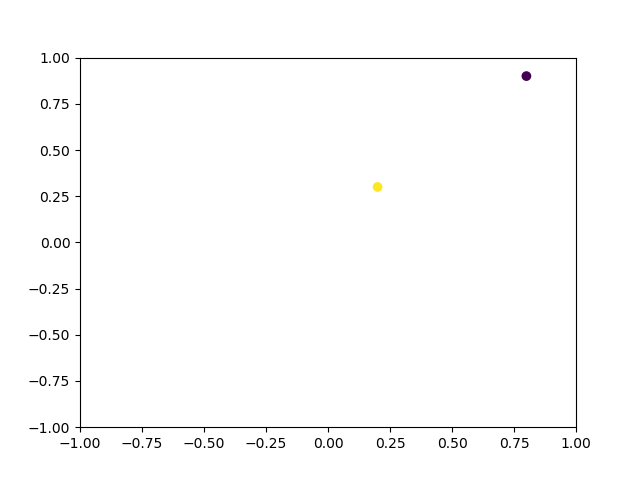

In [6]:
from matplotlib import animation

fig, ax = plt.subplots()

colors = np.arange(len(x_init))
scat = ax.scatter(x_init[:,0], x_init[:,1], c=colors)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
def animate(i):
    index = 33*i
    data = positions[index]
    scat.set_offsets(data)
    ax.contour(X, Y, Z)
    return scat

anim = animation.FuncAnimation(fig, animate, interval=1)

In [7]:
def grad_ljho():
    return

def grad_ljcho(x, q, boxsize=(0, 1)):
    vecs = vectors(x, boxsize)
    return gradients.harmonic(x, boxsize) + gradients.LJ(vecs) - gradients.coulomb(vecs, q)

def descent( x, q, grad, a=1e-4, prec=1e-10, maxst=1e6, k=.1, boxsize=(0, 1) ):
    """Gradient Descent
    
    Arguments:
        x    (float): position vectors (dim = n x 3)
        q: charge
        a    (float): 'learning rate' alpha = 1e-4
        prec (float): difference between steps, precision = 1e-10
        maxst  (int): max # of steps, maxst = 1e6
        k: factor harmonic pot
    
    Output:
        x: position array,
        step: # of steps needed to converge"""
    
    x = x[None, :, :]
    step = 0
    vecs = vectors(x[-1], boxsize)
    #f = gradients.harmonic(x[-1], boxsize) + gradients.LJ(vecs) - gradients.coulomb(vecs, q)
    f = grad(x[-1], q)
    x1 = x[-1] - a * f
    
    while step < maxst and np.linalg.norm(x[-1] - x1) > prec:
        x = np.append(x, x1[None, :, :], axis=0)
        vecs = vectors(x[-1], boxsize)
        #f = gradients.harmonic(x[-1], boxsize) + gradients.LJ(vecs) - gradients.coulomb(vecs, q)
        f = grad(x[-1], q)
        x1 = x[-1] - a * f
        step += 1
        
    return x, step

In [10]:
import time
N = 7
dim = 2
x, y = np.linspace(-N, N, N), np.linspace(-N, N, N)
XX, YY = np.meshgrid(x,y)
q = 10.*np.array([[-1,1][random.randrange(2)] for i in range(N*N)])
print(q)
x_init =np.array([XX.flatten(),YY.flatten()]).T+np.random.uniform(low=-0.5, high=0.5,size=(N*N,dim))
#x_init *= 10
print(len(x_init))
t0 = time.time()
positions, nsteps = descent(x_init, q, grad_ljcho, k=0., a=1e-4, prec=1e-5, maxst=40000)
t1 = time.time()
print(t1-t0)

[-10.  10. -10. -10. -10. -10. -10. -10.  10.  10. -10.  10.  10. -10.
  10.  10. -10. -10.  10.  10. -10.  10.  10.  10.  10.  10.  10.  10.
  10.  10.  10. -10. -10. -10.  10. -10. -10. -10. -10.  10. -10.  10.
 -10.  10.  10. -10. -10. -10. -10.]
49
67.44811701774597


# of steps: 20000 | positions.shape: (20001, 49, 2)
49
49


<IPython.core.display.Javascript object>


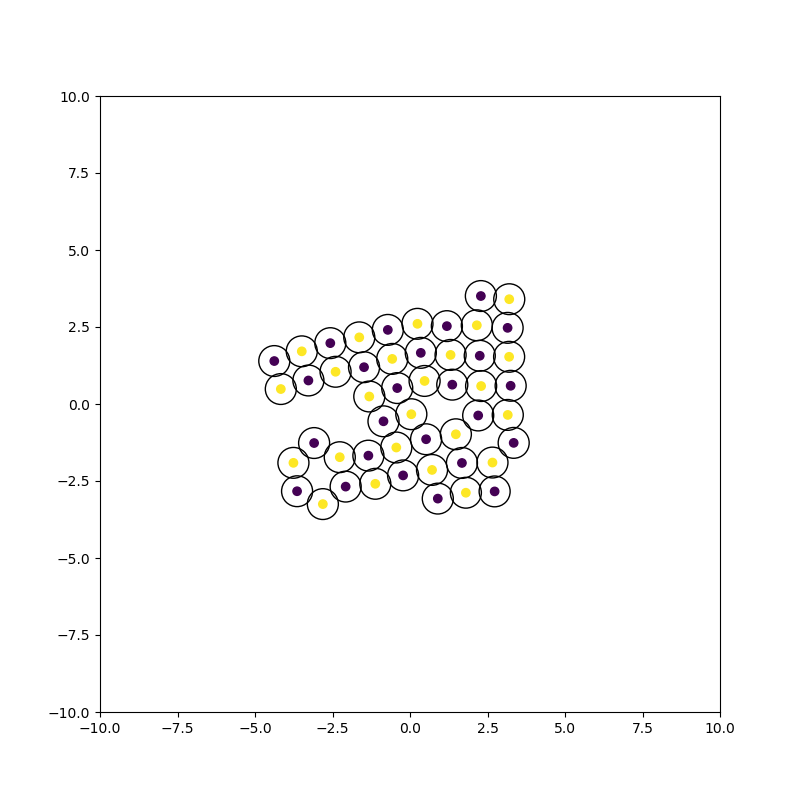

In [12]:
print('# of steps:', nsteps, '| positions.shape:', positions.shape)
print(len(x_init))
#print(positions[0])
#print(positions[-1])
mask=np.count_nonzero(np.linalg.norm(positions[-1], axis=-1)<10)
print(mask)
fig, ax = plt.subplots(figsize=(8, 8))
colors = np.arange(len(x_init))
scat = ax.scatter(x_init[:,0], x_init[:,1], c=q)
circles = [plt.Circle(r, radius=0.5, fill=False) 
            for i,r in enumerate(x_init)]

for c in circles:
    plt.gca().add_patch(c)
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
def animate(i):
    index = 10*i
    data = positions[index]
    scat.set_offsets(data)
    for i, c in enumerate(circles):
        c.center = data[i]
    return scat

anim = animation.FuncAnimation(fig, animate, interval=1)

In [10]:
def video( x_init, q, positions ):
    mask = np.count_nonzero(np.linalg.norm(positions[-1], axis=-1) < 10)
    print(mask)
    fig, ax = plt.subplots(figsize=(8, 8))
    colors = np.arange(len(x_init))
    scat = ax.scatter(x_init[:,0], x_init[:,1], c=q)
    circles = [plt.Circle(r, radius=0.5, fill=False) 
                for i,r in enumerate(x_init)]

    for c in circles:
        plt.gca().add_patch(c)
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    def animate(i):
        index = 4*i
        data = positions[index]
        scat.set_offsets(data)
        for i, c in enumerate(circles):
            c.center = data[i]
        return scat

    anim = animation.FuncAnimation(fig, animate, interval=1)

49


<IPython.core.display.Javascript object>


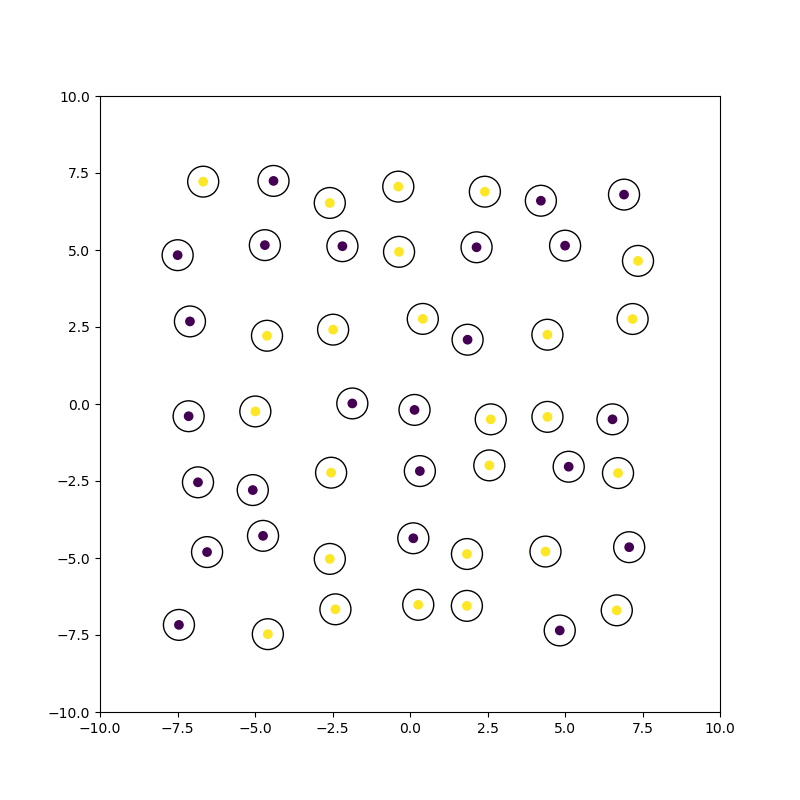

In [12]:
video(x_init, q, positions)